In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
titanic = pd.read_csv("/content/titanic.csv") 
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


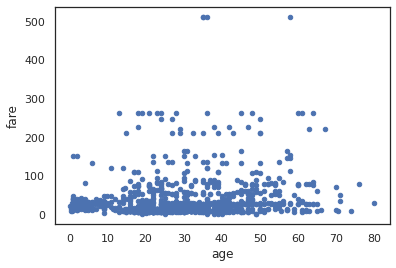

In [7]:
import seaborn as sns 
sns.set(style="white",color_codes=True)
titanic.plot(kind="scatter",x="age", y="fare")
plt.show() 


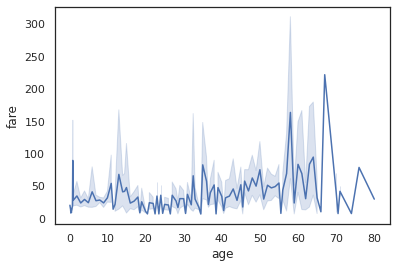

In [8]:
sns.lineplot(x="age", y="fare",data=titanic) 
plt.show() 


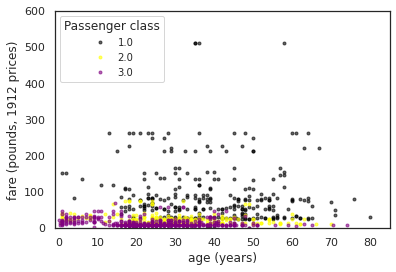

In [24]:
titanic_pclass_fig, titanic_pclass_ax = plt.subplots() 
color = ['black', 'yellow', 'purple']
count = 0 
for name, group in titanic.groupby( 'pclass'): 
    titanic_pclass_ax.plot(group.age, group.fare, '.', 
label = name, alpha = 0.6, 
c = color[count]) 
    count += 1  
titanic_pclass_ax.legend(numpoints=1, title = "Passenger class", fontsize = 10) 
# set axis labels and limits 
plt.xlabel('age (years)') 
plt.ylabel('fare (pounds, 1912 prices)') 
titanic_pclass_ax.set_xlim(-1, 85) 
titanic_pclass_ax.set_ylim(-1, 600) 
plt.show(titanic_pclass_fig) 

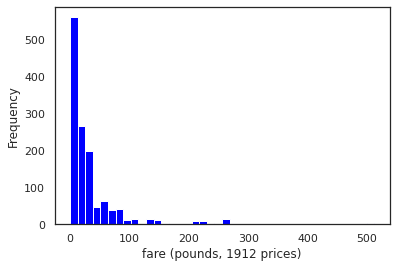

In [ ]:
titanic_hist = titanic.fare.plot.hist(bins = 40, color = 'blue') 
plt.xlabel('fare (pounds, 1912 prices)') 
plt.show(titanic_hist) 


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


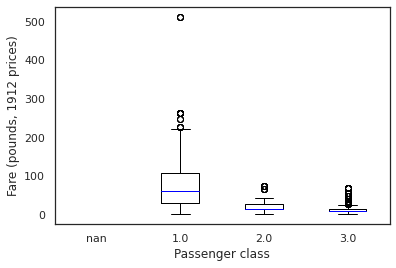

In [26]:
pclass_fare_titanic = titanic[['pclass', 'fare']].pivot(columns = 'pclass', values = 'fare') 
box_color = dict(boxes = 'black', 
whiskers = 'black', medians = 'blue', caps = 'black') 
titanic_pclass_boxplot = pclass_fare_titanic.plot.box(color = box_color) 
plt.xlabel('Passenger class') 
plt.ylabel('Fare (pounds, 1912 prices)') 
plt.show(titanic_pclass_boxplot) 


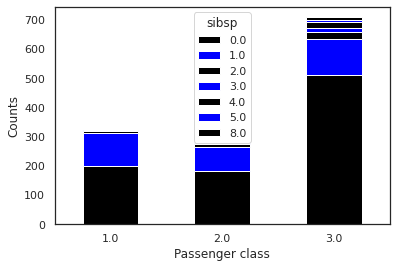

In [28]:
contingency_titanic = titanic.groupby (['pclass', 'sibsp']).size().unstack()
titanic_barplot = contingency_titanic.plot.bar(stacked=True, 
color = ["Black", "Blue"]) 
plt.ylabel("Counts") 
plt.xlabel('Passenger class') 
plt.xticks (rotation=0) 
plt.show(titanic_barplot) 


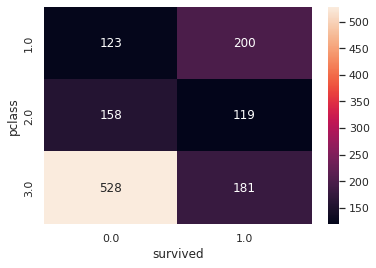

In [11]:
group = titanic.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

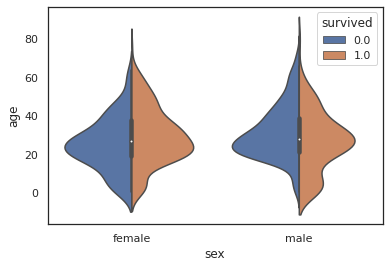

In [12]:
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = titanic, split = True)

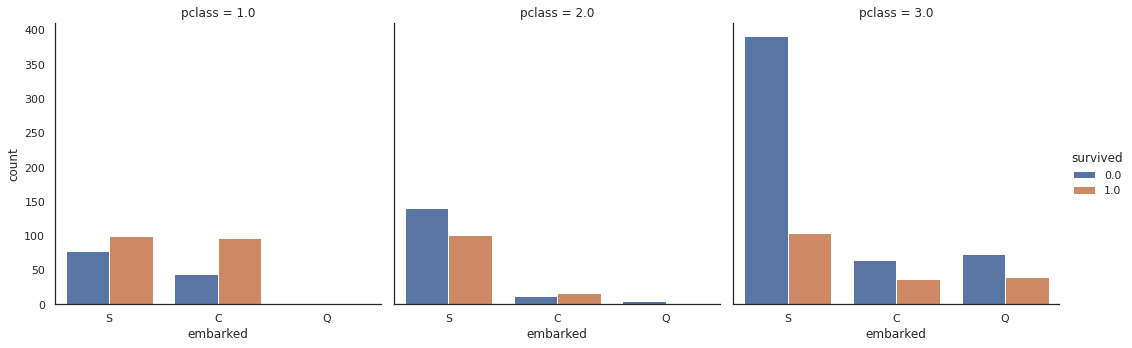

In [18]:
sns.catplot(x ='embarked', hue ='survived',
kind ='count', col ='pclass', data = titanic)

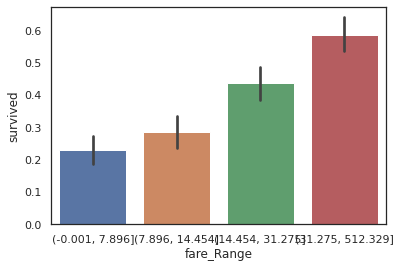

In [14]:
titanic['fare_Range'] = pd.qcut(titanic['fare'], 4)
sns.barplot(x ='fare_Range', y ='survived',data = titanic)

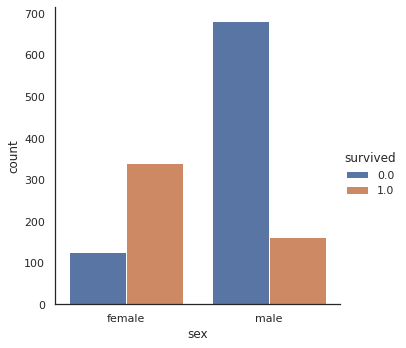

In [19]:
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = titanic)